# OpenCV hough and blob detection

In this notebook we use openCV functions to detect blobs, lines and circles.

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image, median_canny

## Hough line detection

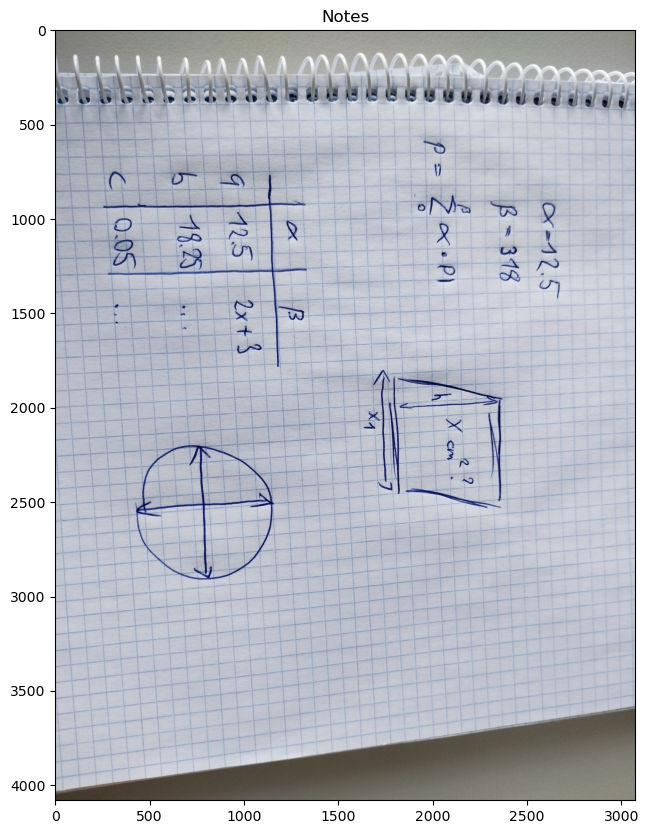

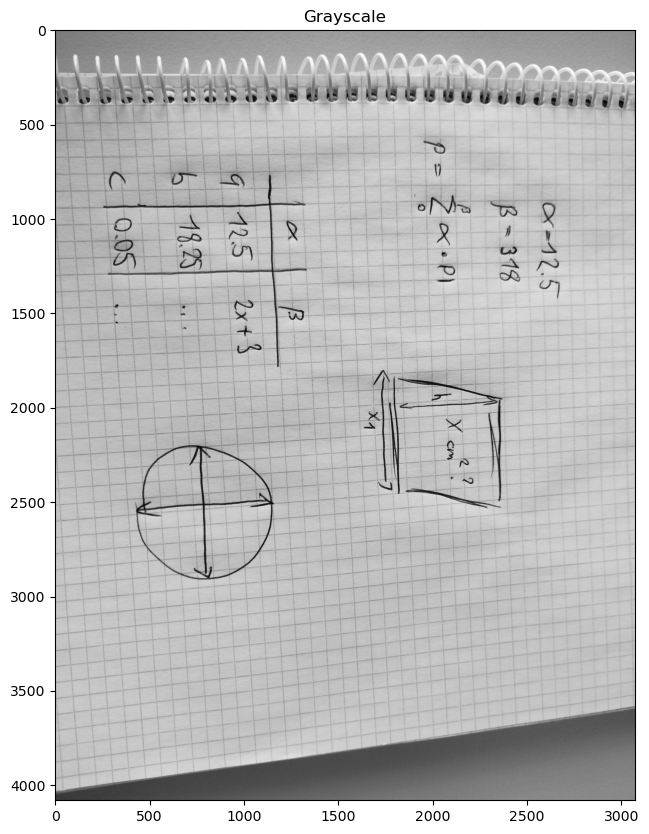

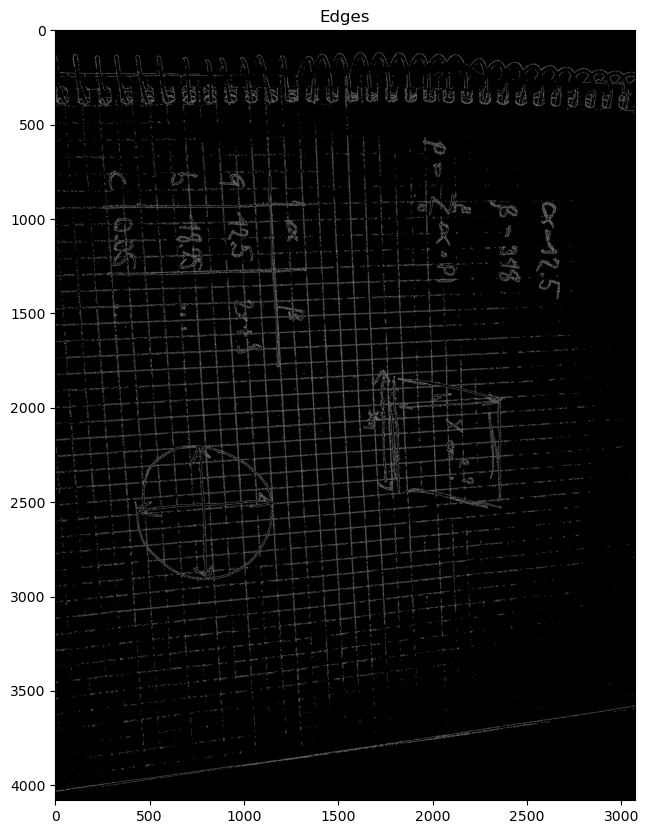

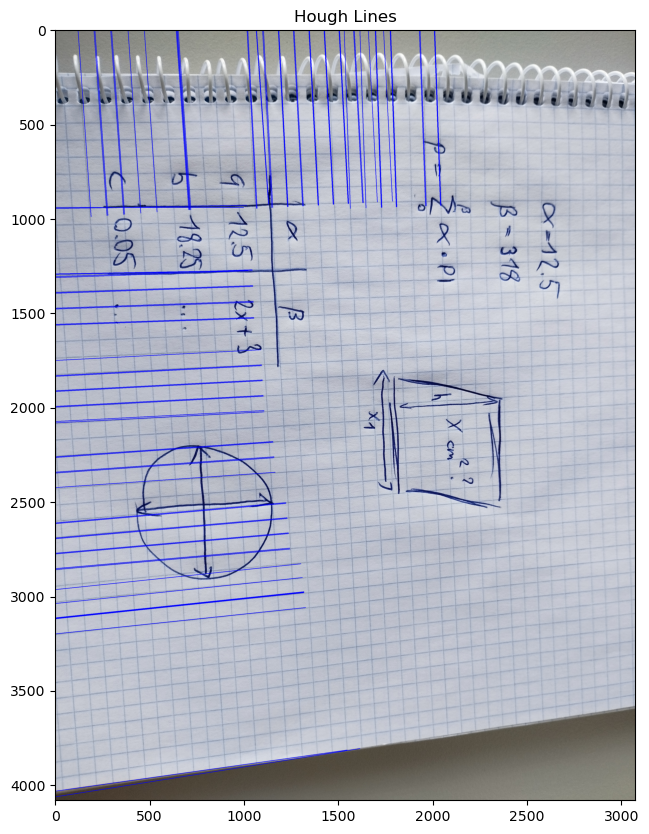

In [3]:
image = cv2.imread('../images/lined_notes.jpg')
show_image(image, 'Notes', 10)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
edges = median_canny(gray)
edges = cv2.Canny(gray, 120, 170, apertureSize = 3)

show_image(gray, 'Grayscale', 10)
show_image(edges, 'Edges', 10)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 400)

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

show_image(image, 'Hough Lines', 10)

## Hough circle detection

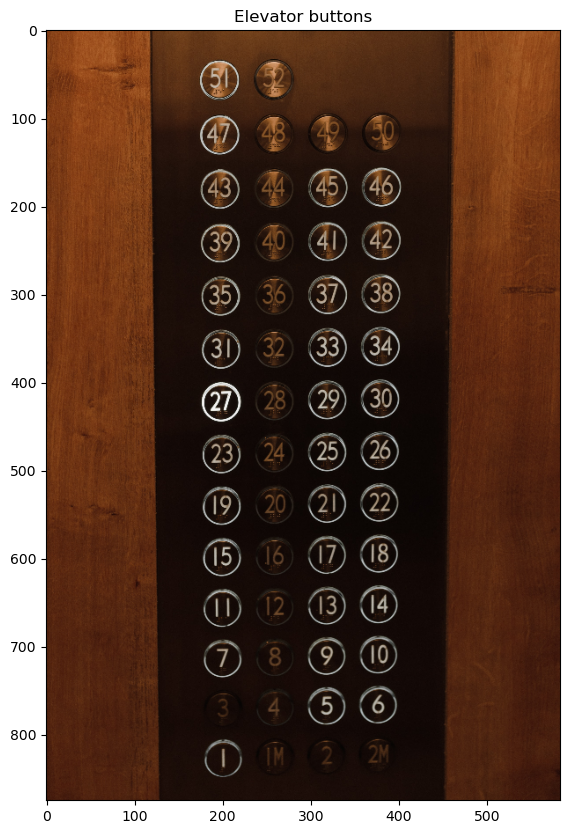

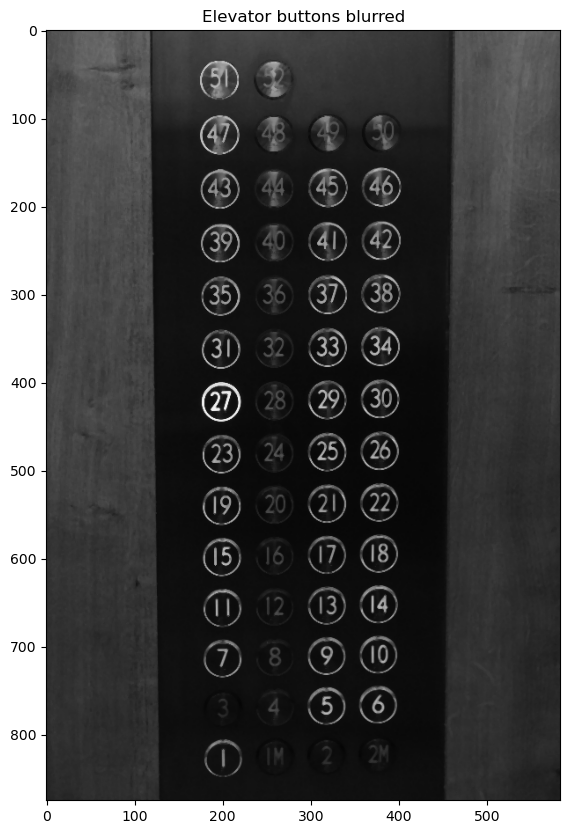

[[[380 299  22]
  [199 423  19]
  [319 538  21]]]


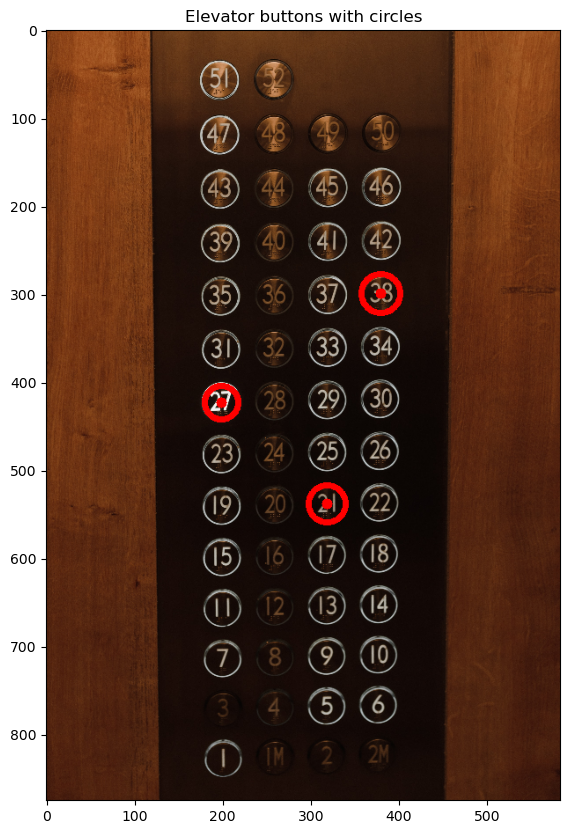

In [42]:
image = cv2.imread('../images/elevator.jpg')
image = cv2.resize(image, None, fx=0.25, fy=0.25)
show_image(image, 'Elevator buttons', 10)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 3)

show_image(blur, 'Elevator buttons blurred', 10)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

circles = np.uint16(np.around(circles))
print(circles)

image_circles = image.copy()

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image_circles,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # draw the center of the circle
    cv2.circle(image_circles, (i[0], i[1]), 2, (0, 0, 255), 8)

show_image(image_circles, 'Elevator buttons with circles', 10)

## Blob / Keypoint detector

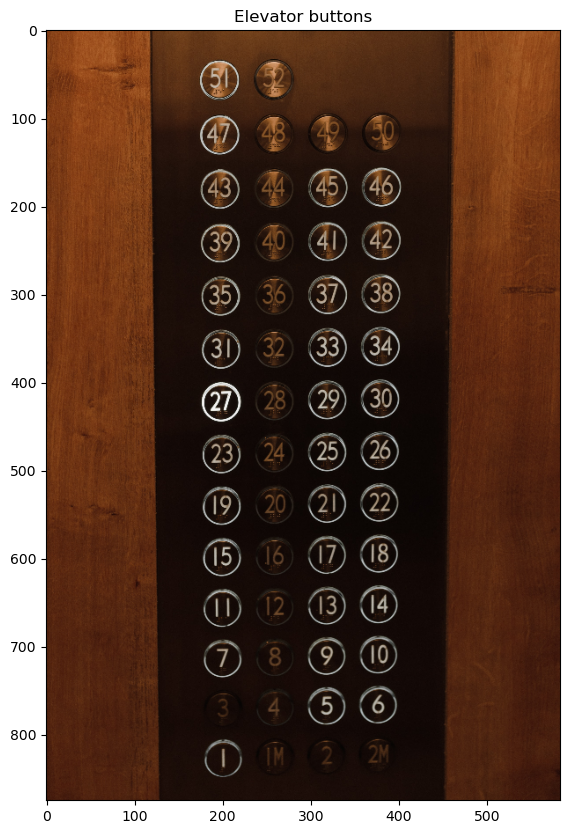

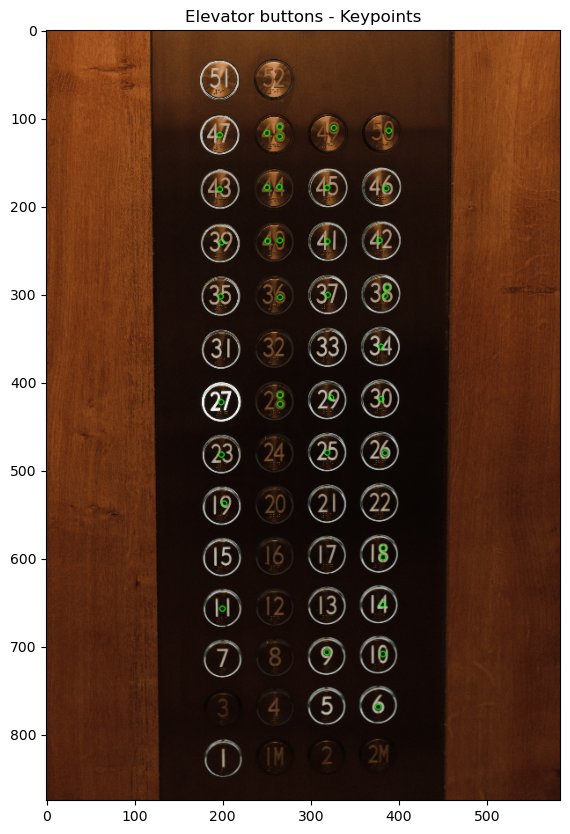

In [46]:
# Read image
show_image(image, 'Elevator buttons', 10)

# Detect blobs
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)
 
# draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
show_image(blobs, 'Elevator buttons - Keypoints', 10)